# Group Project Thicket Python Code

In [23]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [24]:
tk = th.Thicket.from_caliperreader(glob("Bitonic_Input_Type_Random/*.cali"))

In [25]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              96541934      1   
                                                  560706889     1   
                                                  652473513     1   
                                                  725242975     1   
                                                  1502911633    1   
                                                  1584569649    1   
                                                  1839972329    1   
                                                  1872987225    1   
                                                  2079115111    1   
                                                  2185126265    1   
                                                  2266738246    1   
                                                  2454336467    1   
                                                  2550098556    1   
                                                  3513767597    1   
                                                  3981443022    1   
{'name': 'comm', 'type': 'function'}              96541934      3   
                                                  560706889     3   
                                                  652473513     3   
                                                  725242975     3   
                                                  1502911633    3   
                                                  1584569649    3   
                                                  1839972329    3   
                                                  1872987225    3   
                                                  2079115111    3   
                                                  2185126265    3   
                                                  2266738246    3   
                                                  2454336467    3   
                                                  2550098556    3   
                                                  3513767597    3   
                                                  3981443022    3   
{'name': 'comm_large', 'type': 'function'}        96541934      4   
                                                  560706889     4   
                                                  652473513     4   
                                                  725242975     4   
                                                  1502911633    4   
                                                  1584569649    4   
                                                  1839972329    4   
                                                  1872987225    4   
                                                  2079115111    4   
                                                  2185126265    4   
                                                  2266738246    4   
                                                  2454336467    4   
                                                  2550098556    4   
                                                  3513767597    4   
                                                  3981443022    4   
{'name': 'cudaMemcpy', 'type': 'function'}        96541934      5   
                                                  560706889     5   
                                                  652473513     5   
                                                  725242975     5   
                                                  1502911633    5   
                                                  1584569649    5   
                                                  1839972329    5   
                                                  1872987225    5   
                                                  2079115111    5   
                                                  2185126265    5   
                                                  2266738246    5   
                                                  2454336467

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [26]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,user,launchdate,libraries,cmdline,cluster,Algorithm,Programming_Model,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
96541934,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t1024-v4096.cali,hungry4fun,1700021677,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1024, 4096, 1]",g,Bitonic_Sort,CUDA,int,4,4096,random,1024,4,11,"Online, AI"
560706889,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t64-v1024.cali,hungry4fun,1700002474,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 64, 1024, 1]",g,Bitonic_Sort,CUDA,int,4,1024,random,64,16,11,"Online, AI"
652473513,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t256-v1024.cali,hungry4fun,1700003928,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 256, 1024, 1]",g,Bitonic_Sort,CUDA,int,4,1024,random,256,4,11,"Online, AI"
725242975,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t1024-v1024.cali,hungry4fun,1700021656,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1024, 1024, 1]",g,Bitonic_Sort,CUDA,int,4,1024,random,1024,1,11,"Online, AI"
1502911633,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t256-v4096.cali,hungry4fun,1700003941,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 256, 4096, 1]",g,Bitonic_Sort,CUDA,int,4,4096,random,256,16,11,"Online, AI"
1584569649,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t128-v1024.cali,hungry4fun,1700003238,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 128, 1024, 1]",g,Bitonic_Sort,CUDA,int,4,1024,random,128,8,11,"Online, AI"
1839972329,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t512-v16384.cali,hungry4fun,1700021556,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 512, 16384, 1]",g,Bitonic_Sort,CUDA,int,4,16384,random,512,32,11,"Online, AI"
1872987225,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t1024-v16384.cali,hungry4fun,1700021713,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1024, 16384, 1]",g,Bitonic_Sort,CUDA,int,4,16384,random,1024,16,11,"Online, AI"
2079115111,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,bitonic-t512-v1024.cali,hungry4fun,1700021516,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 512, 1024, 1]",g,Bitonic_Sort,CUDA,int,4,1024,random,512,2,11,"Online, AI"


In [27]:
gb = tk.groupby("InputSize")

3  thickets created...
{1024: <thicket.thicket.Thicket object at 0x2b9aeb523040>, 4096: <thicket.thicket.Thicket object at 0x2b9aeb63af10>, 16384: <thicket.thicket.Thicket object at 0x2b9af0063310>}


Compose these 3 groups column-wise to get a holistic view of the data

In [28]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [29]:
ctk.dataframe

1024  \
                                                               nid   
node                                              num_threads        
{'name': 'main', 'type': 'function'}              64             1   
                                                  128            1   
                                                  256            1   
                                                  512            1   
                                                  1024           1   
{'name': 'comm', 'type': 'function'}              64             3   
                                                  128            3   
                                                  256            3   
                                                  512            3   
                                                  1024           3   
{'name': 'comm_large', 'type': 'function'}        64             4   
                                                  128            4   
                                                  256            4   
                                                  512            4   
                                                  1024           4   
{'name': 'cudaMemcpy', 'type': 'function'}        64             5   
                                                  128            5   
                                                  256            5   
                                                  512            5   
                                                  1024           5   
{'name': 'comp', 'type': 'function'}              64             6   
                                                  128            6   
                                                  256            6   
                                                  512            6   
                                                  1024           6   
{'name': 'comp_large', 'type': 'function'}        64             7   
                                                  128            7   
                                                  256            7   
                                                  512            7   
                                                  1024           7   
{'name': 'correctness_check', 'type': 'function'} 64             8   
                                                  128            8   
                                                  256            8   
                                                  512            8   
                                                  1024           8   
{'name': 'data_init', 'type': 'function'}         64             2   
                                                  128            2   
                                                  256            2   
                                                  512            2   
                                                  1024           2   

                                                                              \
                                                                spot.channel   
node                                              num_threads                  
{'name': 'main', 'type': 'function'}              64           regionprofile   
                                                  128          regionprofile   
                                                  256          regionprofile   
                                                  512          regionprofile   
                                                  1024         regionprofile   
{'name': 'comm', 'type': 'function'}              64           regionprofile   
                                                  128          regionprofile   
                                                  256          regionprofile   
                                                  512          regionprofile   
                                                  1024         regionprofile   
{'name': 'c

Perform pandas operations to get the table in a desirable format for plotting

In [30]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node",""),(1024,"nid"),(1024,"spot.channel"),(1024,"Min time/rank"),(1024,"Max time/rank"),(1024,"Total time"),(1024,"Avg GPU time/rank"),(1024,"Min GPU time/rank"),(1024,"Max GPU time/rank"),(1024,"Total GPU time")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(4096,"nid"),(4096,"spot.channel"),(4096,"Min time/rank"),(4096,"Max time/rank"),(4096,"Total time"),(4096,"Avg GPU time/rank"),(4096,"Min GPU time/rank"),(4096,"Max GPU time/rank"),(4096,"Total GPU time")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("index",""),("level_0",""),(16384,"nid"),(16384,"spot.channel"),(16384,"Min time/rank"),(16384,"Max time/rank"),(16384,"Total time"),(16384,"Avg GPU time/rank"),(16384,"Min GPU time/rank"),(16384,"Max GPU time/rank"),(16384,"Total GPU time")], axis=1)






ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [31]:
ctk.dataframe

1024          4096         16384
                              Avg time/rank Avg time/rank Avg time/rank
name              num_threads                                          
main              64               0.370989      0.609945      0.438727
                  128              0.347086      0.344271      0.326202
                  256              0.357554      0.419570      0.338350
                  512              0.721727      0.344057      0.340769
                  1024             0.454748      0.340919      0.399293
comm              64               0.000203      0.000208      0.000213
                  128              0.000188      0.000208      0.000196
                  256              0.000176      0.000189      0.000244
                  512              0.000293      0.000205      0.000211
                  1024             0.000330      0.000184      0.000200
comm_large        64               0.000146      0.000149      0.000158
                  128              0.000127      0.000146      0.000138
                  256              0.000116      0.000132      0.000179
                  512              0.000209      0.000144      0.000152
                  1024             0.000229      0.000125      0.000147
cudaMemcpy        64               0.000116      0.000117      0.000129
                  128              0.000095      0.000113      0.000108
                  256              0.000083      0.000101      0.000143
                  512              0.000147      0.000110      0.000119
                  1024             0.000171      0.000091      0.000116
comp              64               0.001041      0.001515      0.001797
                  128              0.001010      0.001322      0.001646
                  256              0.000934      0.001261      0.001800
                  512              0.001410      0.001374      0.001676
                  1024             0.001391      0.001340      0.001858
comp_large        64               0.001027      0.001499      0.001782
                  128              0.000995      0.001306      0.001632
                  256              0.000919      0.001247      0.001781
                  512              0.001372      0.001356      0.001661
                  1024             0.001354      0.001325      0.001843
correctness_check 64               0.000035      0.000045      0.000076
                  128              0.000036      0.000046      0.000081
                  256              0.000037      0.000040      0.000089
                  512              0.000071      0.000048      0.000081
                  1024             0.000051      0.000045      0.000080
data_init         64               0.000068      0.000131      0.000373
                  128              0.000049      0.000111      0.000371
                  256              0.000047      0.000112      0.000376
                  512              0.000048      0.000113      0.000372
                  1024             0.000046      0.000112      0.000377

In [32]:
# var = ctk.dataframe.loc["comp_large", 1024]
# ctk.dataframe.loc["comp_large", 1024]

In [33]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
matrix_sizes = ctk.dataframe.columns.tolist()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [34]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [35]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [36]:
ctk.dataframe.loc["main"]

,1024,4096,16384
,Avg time/rank,Avg time/rank,Avg time/rank
num_threads,,,
64,0.370989,0.609945,0.438727
128,0.347086,0.344271,0.326202
256,0.357554,0.419570,0.338350
512,0.721727,0.344057,0.340769
1024,0.454748,0.340919,0.399293


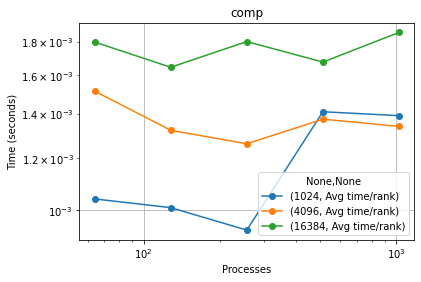

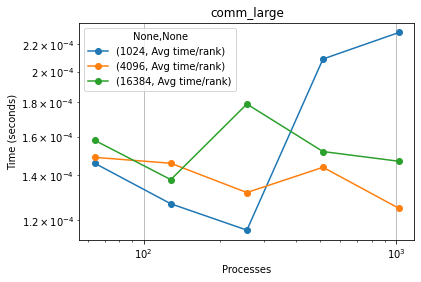

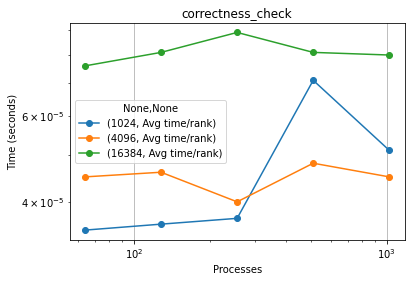

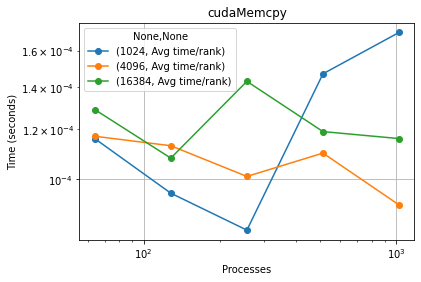

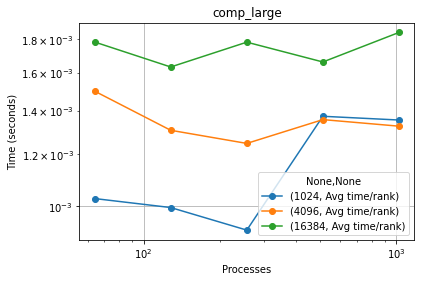

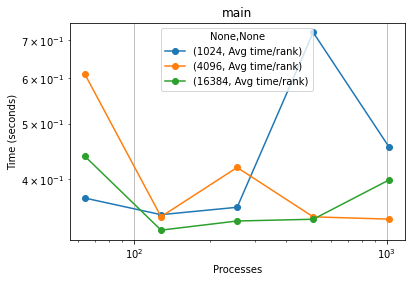

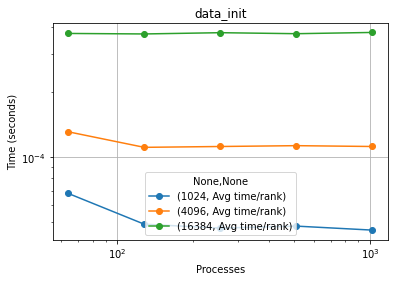

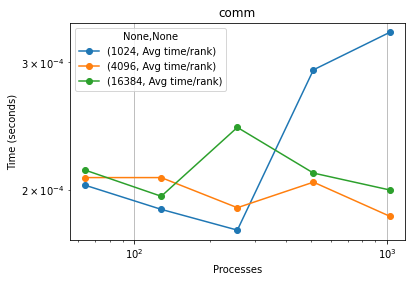

In [37]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

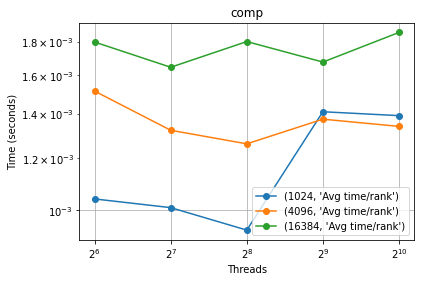

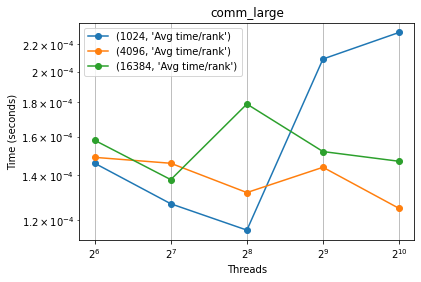

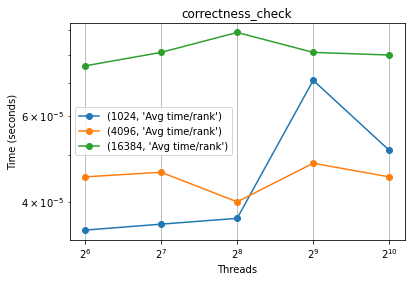

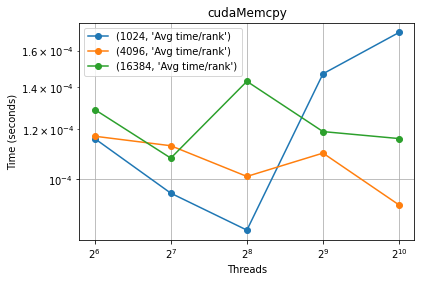

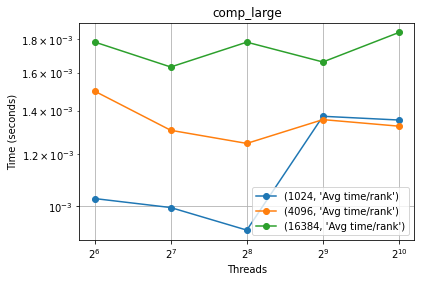

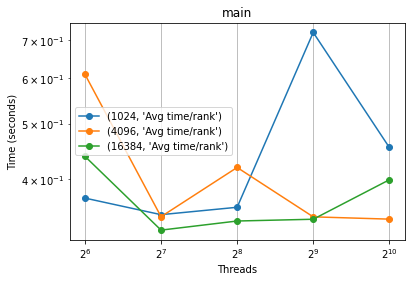

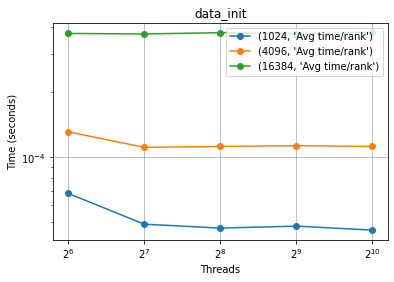

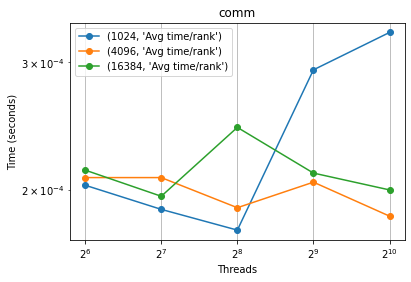

In [38]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

## Speedup

<ipython-input-39-4e94acc1117b>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe


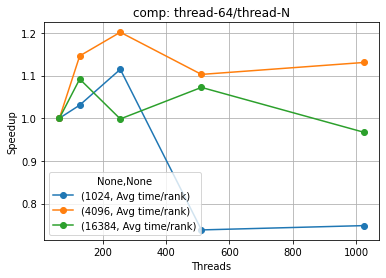

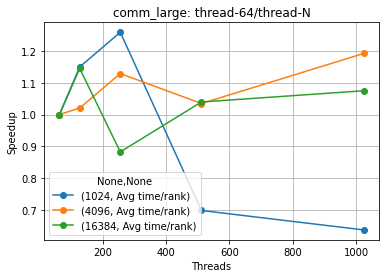

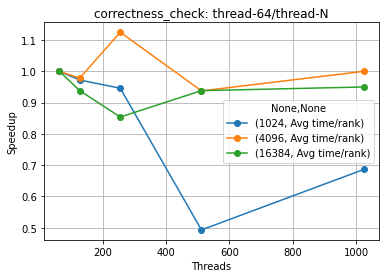

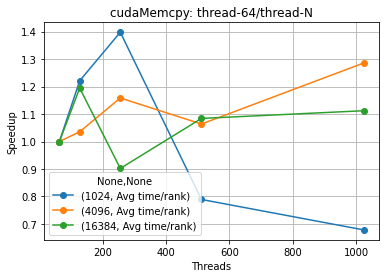

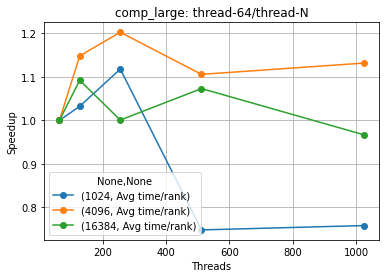

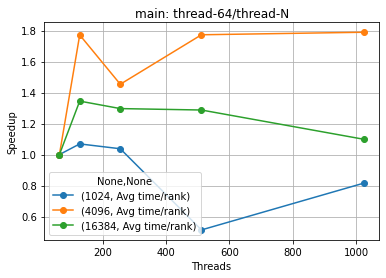

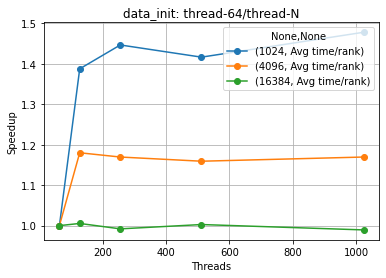

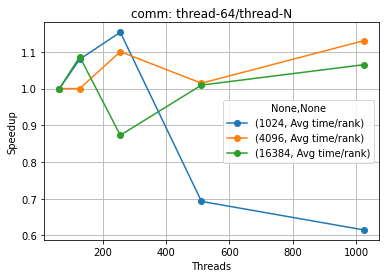

In [39]:
# print(ctk.dataframe.index.levels)

speedup_df = ctk.dataframe.loc[(slice(None),64), :].reset_index().drop("num_threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-64/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

In [40]:
 print(ctk.dataframe.index.levels)

[['comm', 'comm_large', 'comp', 'comp_large', 'correctness_check', 'cudaMemcpy', 'data_init', 'main'], [64, 128, 256, 512, 1024]]
